#### Implementing PCA

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis

In [3]:
data = pd.read_csv("Imputed_Institutional_Data.csv")
data = data.dropna()
numeric_data = data.drop(columns=['Country', 'Year'])

numeric_data_standardized = (numeric_data - numeric_data.mean()) / numeric_data.std()

pca = PCA()
pca.fit(numeric_data_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var * 100:.2f}% variance explained")

PC1: 85.08% variance explained
PC2: 6.44% variance explained
PC3: 4.79% variance explained
PC4: 2.01% variance explained
PC5: 0.85% variance explained
PC6: 0.83% variance explained


#### Implementing FA

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

np.float64(0.9004520442043933)

In [5]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df_scaled)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.10473448, 0.38647687, 0.28732899, 0.12074724, 0.05093905,
       0.04977337])

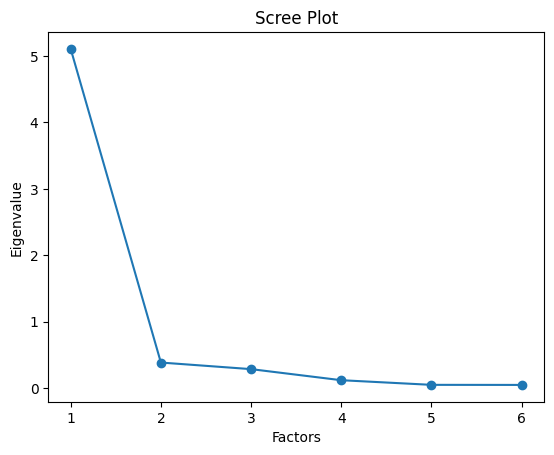

In [6]:
import matplotlib.pyplot as plt
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [7]:
columns_for_fa = [
    'Control_of_Corruption','Government_Effectiveness','Political_Stability','Regulatory_Quality','Rule_of_Law',
    'Voice_and_Accountability'
]

data_filled = data[columns_for_fa]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

fa = FactorAnalysis(n_components=1)

factor_scores = fa.fit_transform(data_scaled)

data['Economic_Index_FA'] = factor_scores.round(3)

pca = PCA(n_components=1)
pca_scores = pca.fit_transform(data_scaled)
data['Economic_Index_PCA'] = pca_scores.round(3)

data.to_csv("Institutional_Index.csv", index=False)